## Acquisition success yearly trending

To run this standalone on the HEAD or GRETA networks:
```
# Get into Ska3 environment
git clone https://github.com/sot/aca_stats.git
cd aca_stats
jupyter nbconvert --to notebook --execute acq-success-trend-yearly.ipynb
ls -lrt
```
This will create the png and csv output files.

In [1]:
import numpy as np
from agasc import get_supplement_table
%matplotlib inline
from astropy.table import Table
from mica.stats.acq_stats import get_stats
from cxotime import CxoTime
import matplotlib.pyplot as plt
from chandra_aca.star_probs import binom_ppf

In [2]:
stats = Table(get_stats())
len(stats)

281155

In [3]:
stats[-1]

obsid,obi,acq_start,guide_start,guide_tstart,one_shot_length,revision,slot,idx,type,yang,zang,halfw,mag,acqid,star_tracked,spoiler_tracked,img_func,n_trak_interv,max_trak_cdy,min_trak_cdy,mean_trak_cdy,max_trak_cdz,min_trak_cdz,mean_trak_cdz,max_trak_mag,min_trak_mag,mean_trak_mag,cdy,cdz,dy,dz,ion_rad,def_pix,mult_star,sat_pix,mag_obs,yang_obs,zang_obs,agasc_id,color1,ra,dec,epoch,pm_ra,pm_dec,var,pos_err,mag_aca,mag_err,mag_band,pos_catid,aspq1,aspq2,aspq3,acqq1,acqq2,acqq4,n100_warm_frac,ccd_temp,known_bad,bad_comment
int64,int64,bytes21,bytes21,float64,float64,bytes15,int64,int64,bytes5,float64,float64,int64,float64,bool,bool,bool,bytes7,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,bool,bool,bool,float64,float64,float64,int64,float64,float64,float64,float64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,bool,bytes15
25905,0,2023:127:02:14:48.722,2023:127:02:15:28.697,799812997.8809999,30.880641848331717,1.0,7,8,BOT,-532.0,-1076.0,140,9.183,True,True,False,star,1,0.348955543699617,0.12229183792396725,0.215201405745865,-1.377824811013852,-1.9199225868987924,-1.6108892713631349,9.125,9.125,9.125,0.30750832148271456,-1.8153087815258004,-3.20931430097653,30.24489637517854,False,False,False,False,9.125,-542.45,-1039.175,41691856,0.7726503610610962,215.89125262,0.04708222,2000.0,26,-9999,-9999,25,9.148642539978027,3,4,5,0,0,999,-9999,-9999,466,0.4575395637946367,-4.70794677734375,False,


In [4]:
curr_year = CxoTime.now().decimalyear
obs_year = CxoTime(stats['guide_tstart']).decimalyear
stats['iyear'] = np.round(obs_year)

In [5]:
curr_year

2023.3524030533993

In [6]:
obs_year[-1]

2023.345463238743

In [7]:
# Correct ACA mags using AGASC supplement
obs_mags = get_supplement_table('mags', as_dict=True)
n_match = 0
for row in stats:
    try:
        row['mag'] = obs_mags[row['agasc_id']]['mag_aca']
        n_match += 1
    except KeyError:
        pass
print(n_match)

232477


In [8]:
# Select only faint stars.
# Original version of notebook filtered on stats['halfw'] >= 120 but don't do that here.
ok = (stats['mag'] >= 9.6) & (stats['mag'] < 10.6)
sok = stats[ok]

In [9]:
len(sok)

66707

In [10]:
n_match

232477

In [11]:
sok['imag'] = np.trunc(sok['mag'] * 5) / 5

In [12]:
sg = sok.group_by(keys=['imag', 'iyear'])['imag', 'iyear', 'star_tracked']

In [13]:
len(sg.groups)

110

In [14]:
for grp in sg.groups:
    print(grp['imag'][0], grp['iyear'][0], np.sum(grp['star_tracked']), len(grp), 
          '{:.2f}'.format(np.sum(grp['star_tracked']) / len(grp)))

9.6 2002.0 179 184 0.97
9.6 2003.0 867 881 0.98
9.6 2004.0 773 787 0.98
9.6 2005.0 894 906 0.99
9.6 2006.0 930 947 0.98
9.6 2007.0 891 913 0.98
9.6 2008.0 1041 1069 0.97
9.6 2009.0 972 981 0.99
9.6 2010.0 1124 1149 0.98
9.6 2011.0 1113 1129 0.99
9.6 2012.0 1030 1052 0.98
9.6 2013.0 1105 1128 0.98
9.6 2014.0 896 927 0.97
9.6 2015.0 1015 1056 0.96
9.6 2016.0 1090 1136 0.96
9.6 2017.0 1065 1134 0.94
9.6 2018.0 1237 1326 0.93
9.6 2019.0 1149 1273 0.90
9.6 2020.0 702 780 0.90
9.6 2021.0 833 911 0.91
9.6 2022.0 842 978 0.86
9.6 2023.0 737 856 0.86
9.8 2002.0 91 92 0.99
9.8 2003.0 759 786 0.97
9.8 2004.0 659 679 0.97
9.8 2005.0 714 722 0.99
9.8 2006.0 1013 1034 0.98
9.8 2007.0 758 782 0.97
9.8 2008.0 996 1028 0.97
9.8 2009.0 945 965 0.98
9.8 2010.0 1075 1109 0.97
9.8 2011.0 1149 1174 0.98
9.8 2012.0 911 927 0.98
9.8 2013.0 934 970 0.96
9.8 2014.0 909 937 0.97
9.8 2015.0 758 795 0.95
9.8 2016.0 854 901 0.95
9.8 2017.0 944 1013 0.93
9.8 2018.0 962 1078 0.89
9.8 2019.0 971 1094 0.89
9.8 2020.0 4

In [15]:
# This is the way to plot error bars, but they end up being too messy anyway.
binom_ppf(7, 13, [0.16, 0.5, 0.84])

array([0.40476421, 0.53435284, 0.66081003])

In [16]:
# The mean of the star_tracked 0's and 1's is the tracking fraction.
sga = sg.groups.aggregate(np.mean)

In [17]:
print(sga)

imag iyear     star_tracked   
---- ------ ------------------
 9.6 2002.0 0.9728260869565217
 9.6 2003.0 0.9841089670828603
 9.6 2004.0 0.9822109275730623
 9.6 2005.0 0.9867549668874173
 9.6 2006.0 0.9820485744456178
 9.6 2007.0 0.9759036144578314
 ...    ...                ...
10.4 2017.0                0.6
10.4 2018.0 0.5384615384615384
10.4 2019.0 0.5523465703971119
10.4 2020.0 0.7578947368421053
10.4 2021.0 0.5416666666666666
10.4 2022.0 0.5864661654135338
10.4 2023.0                0.5
Length = 110 rows


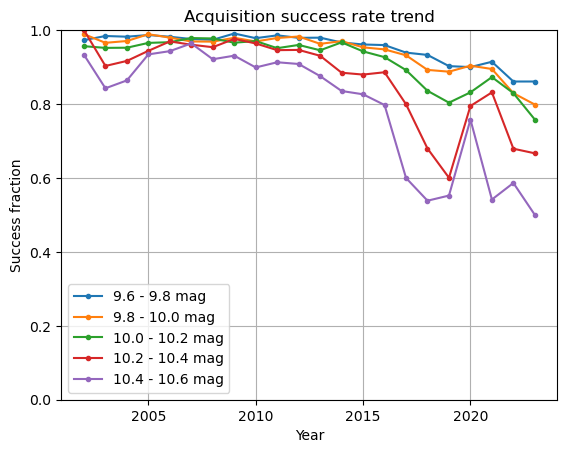

In [18]:
# Make the plot
fig, ax = plt.subplots()
imags = sorted(set(sga['imag']))
for imag in imags:
    ok = sga['imag'] == imag
    ax.plot(sga['iyear'][ok], sga['star_tracked'][ok], '-o', ms=3,
            label=f'{imag:.1f} - {imag+0.2:.1f} mag')
ax.legend()
ax.grid()

ax.set_title('Acquisition success rate trend')
ax.set_ylabel('Success fraction')
ax.set_xlabel('Year')
ax.set_ylim(0, 1);
plt.savefig('acq_success_yearly_jan1_centered.png', dpi=150)


In [19]:
sga.write('acq_success_year_bins_jan1_centered.csv', overwrite=True)